In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
import os

In [3]:
figures_path = f"../figures/ic2s2"
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

In [4]:
wandb_df = pd.read_csv("/Users/bonati/Desktop/wandb_export_2023-07-07.csv")
wandb_df

,episode,avg_reward_all_envs,avg_reward_rule_based_myopic_all_envs,avg_reward_rule_based_3losses_all_envs,avg_level_all_envs,avg_level_rule_based_myopic_all_envs,avg_level_rule_based_3losses_all_envs,avg_reward_rule_based_random_all_envs,avg_level_rule_based_random_all_envs,q_mean_step_1,...,q_max_step_8,test_avg_reward_all_envs,test_avg_reward_rule_based_3losses_all_envs,test_avg_level_all_envs,test_avg_level_rule_based_3losses_all_envs,test_avg_reward_rule_based_myopic_all_envs,test_avg_reward_rule_based_random_all_envs,test_avg_level_rule_based_myopic_all_envs,test_avg_level_rule_based_random_all_envs,batch_loss
0,1,456.5,772.0,1134.5,2.38,0.21,3.59,487.0,2.32,0.026452,...,0.154026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,531.5,759.0,999.0,2.32,0.14,3.60,494.0,2.31,0.023552,...,0.139791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,474.0,753.0,1043.5,2.46,0.19,3.67,486.5,2.38,0.019446,...,0.148311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,552.0,786.0,1058.0,2.33,0.16,3.63,458.5,2.34,0.017615,...,0.148852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,470.0,728.5,966.0,2.27,0.14,3.45,495.0,2.39,0.020446,...,0.136039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1106.0,647.5,1154.5,2.85,0.19,3.79,508.5,2.09,-0.883023,...,1.106967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,19997,1308.0,721.0,1039.5,3.44,0.16,3.55,512.0,2.41,-0.839467,...,1.096742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,19998,1120.5,753.0,1135.0,2.84,0.18,3.78,437.5,2.19,-0.853086,...,1.133980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,19999,1273.5,702.5,1140.5,3.50,0.19,3.82,443.5,2.35,-0.873183,...,1.133980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wandb_df.columns

Index(['episode', 'avg_reward_all_envs',
       'avg_reward_rule_based_myopic_all_envs',
       'avg_reward_rule_based_3losses_all_envs', 'avg_level_all_envs',
       'avg_level_rule_based_myopic_all_envs',
       'avg_level_rule_based_3losses_all_envs',
       'avg_reward_rule_based_random_all_envs',
       'avg_level_rule_based_random_all_envs', 'q_mean_step_1', 'q_max_step_1',
       'q_mean_step_2', 'q_max_step_2', 'q_mean_step_3', 'q_max_step_3',
       'q_mean_step_4', 'q_max_step_4', 'q_mean_step_5', 'q_max_step_5',
       'q_mean_step_6', 'q_max_step_6', 'q_mean_step_7', 'q_max_step_7',
       'q_mean_step_8', 'q_max_step_8', 'test_avg_reward_all_envs',
       'test_avg_reward_rule_based_3losses_all_envs',
       'test_avg_level_all_envs', 'test_avg_level_rule_based_3losses_all_envs',
       'test_avg_reward_rule_based_myopic_all_envs',
       'test_avg_reward_rule_based_random_all_envs',
       'test_avg_level_rule_based_myopic_all_envs',
       'test_avg_level_rule_based_rand

In [6]:
wandb_df = wandb_df[['episode',
                     'avg_reward_all_envs',
                     'avg_reward_rule_based_myopic_all_envs',
                     'avg_reward_rule_based_3losses_all_envs',
                     'avg_reward_rule_based_random_all_envs',
                     'avg_level_rule_based_random_all_envs',
                     'avg_level_all_envs',
                     'avg_level_rule_based_myopic_all_envs',
                     'avg_level_rule_based_3losses_all_envs',
                     'test_avg_reward_all_envs',
                     'test_avg_reward_rule_based_3losses_all_envs',
                     'test_avg_reward_rule_based_myopic_all_envs',
                     'test_avg_reward_rule_based_random_all_envs',
                     'test_avg_level_all_envs',
                     'test_avg_level_rule_based_3losses_all_envs',
                     'test_avg_level_rule_based_myopic_all_envs',
                     'test_avg_level_rule_based_random_all_envs']]

In [7]:
df = pd.melt(wandb_df, id_vars=['episode'], value_vars=['avg_reward_all_envs',
                     'avg_reward_rule_based_myopic_all_envs',
                     'avg_reward_rule_based_3losses_all_envs',
                     'avg_reward_rule_based_random_all_envs',
                     'avg_level_rule_based_random_all_envs',
                     'avg_level_all_envs',
                     'avg_level_rule_based_myopic_all_envs',
                     'avg_level_rule_based_3losses_all_envs',
                     'test_avg_reward_all_envs',
                     'test_avg_reward_rule_based_3losses_all_envs',
                     'test_avg_reward_rule_based_myopic_all_envs',
                     'test_avg_reward_rule_based_random_all_envs',
                     'test_avg_level_all_envs',
                     'test_avg_level_rule_based_3losses_all_envs',
                     'test_avg_level_rule_based_myopic_all_envs',
                     'test_avg_level_rule_based_random_all_envs'],
             var_name='metric_name', value_name='metric_value'
             )
df

,episode,metric_name,metric_value
0,1,avg_reward_all_envs,456.500
1,2,avg_reward_all_envs,531.500
2,3,avg_reward_all_envs,474.000
3,4,avg_reward_all_envs,552.000
4,5,avg_reward_all_envs,470.000
...,...,...,...
319995,19996,test_avg_level_rule_based_random_all_envs,NaN
319996,19997,test_avg_level_rule_based_random_all_envs,NaN
319997,19998,test_avg_level_rule_based_random_all_envs,NaN
319998,19999,test_avg_level_rule_based_random_all_envs,NaN


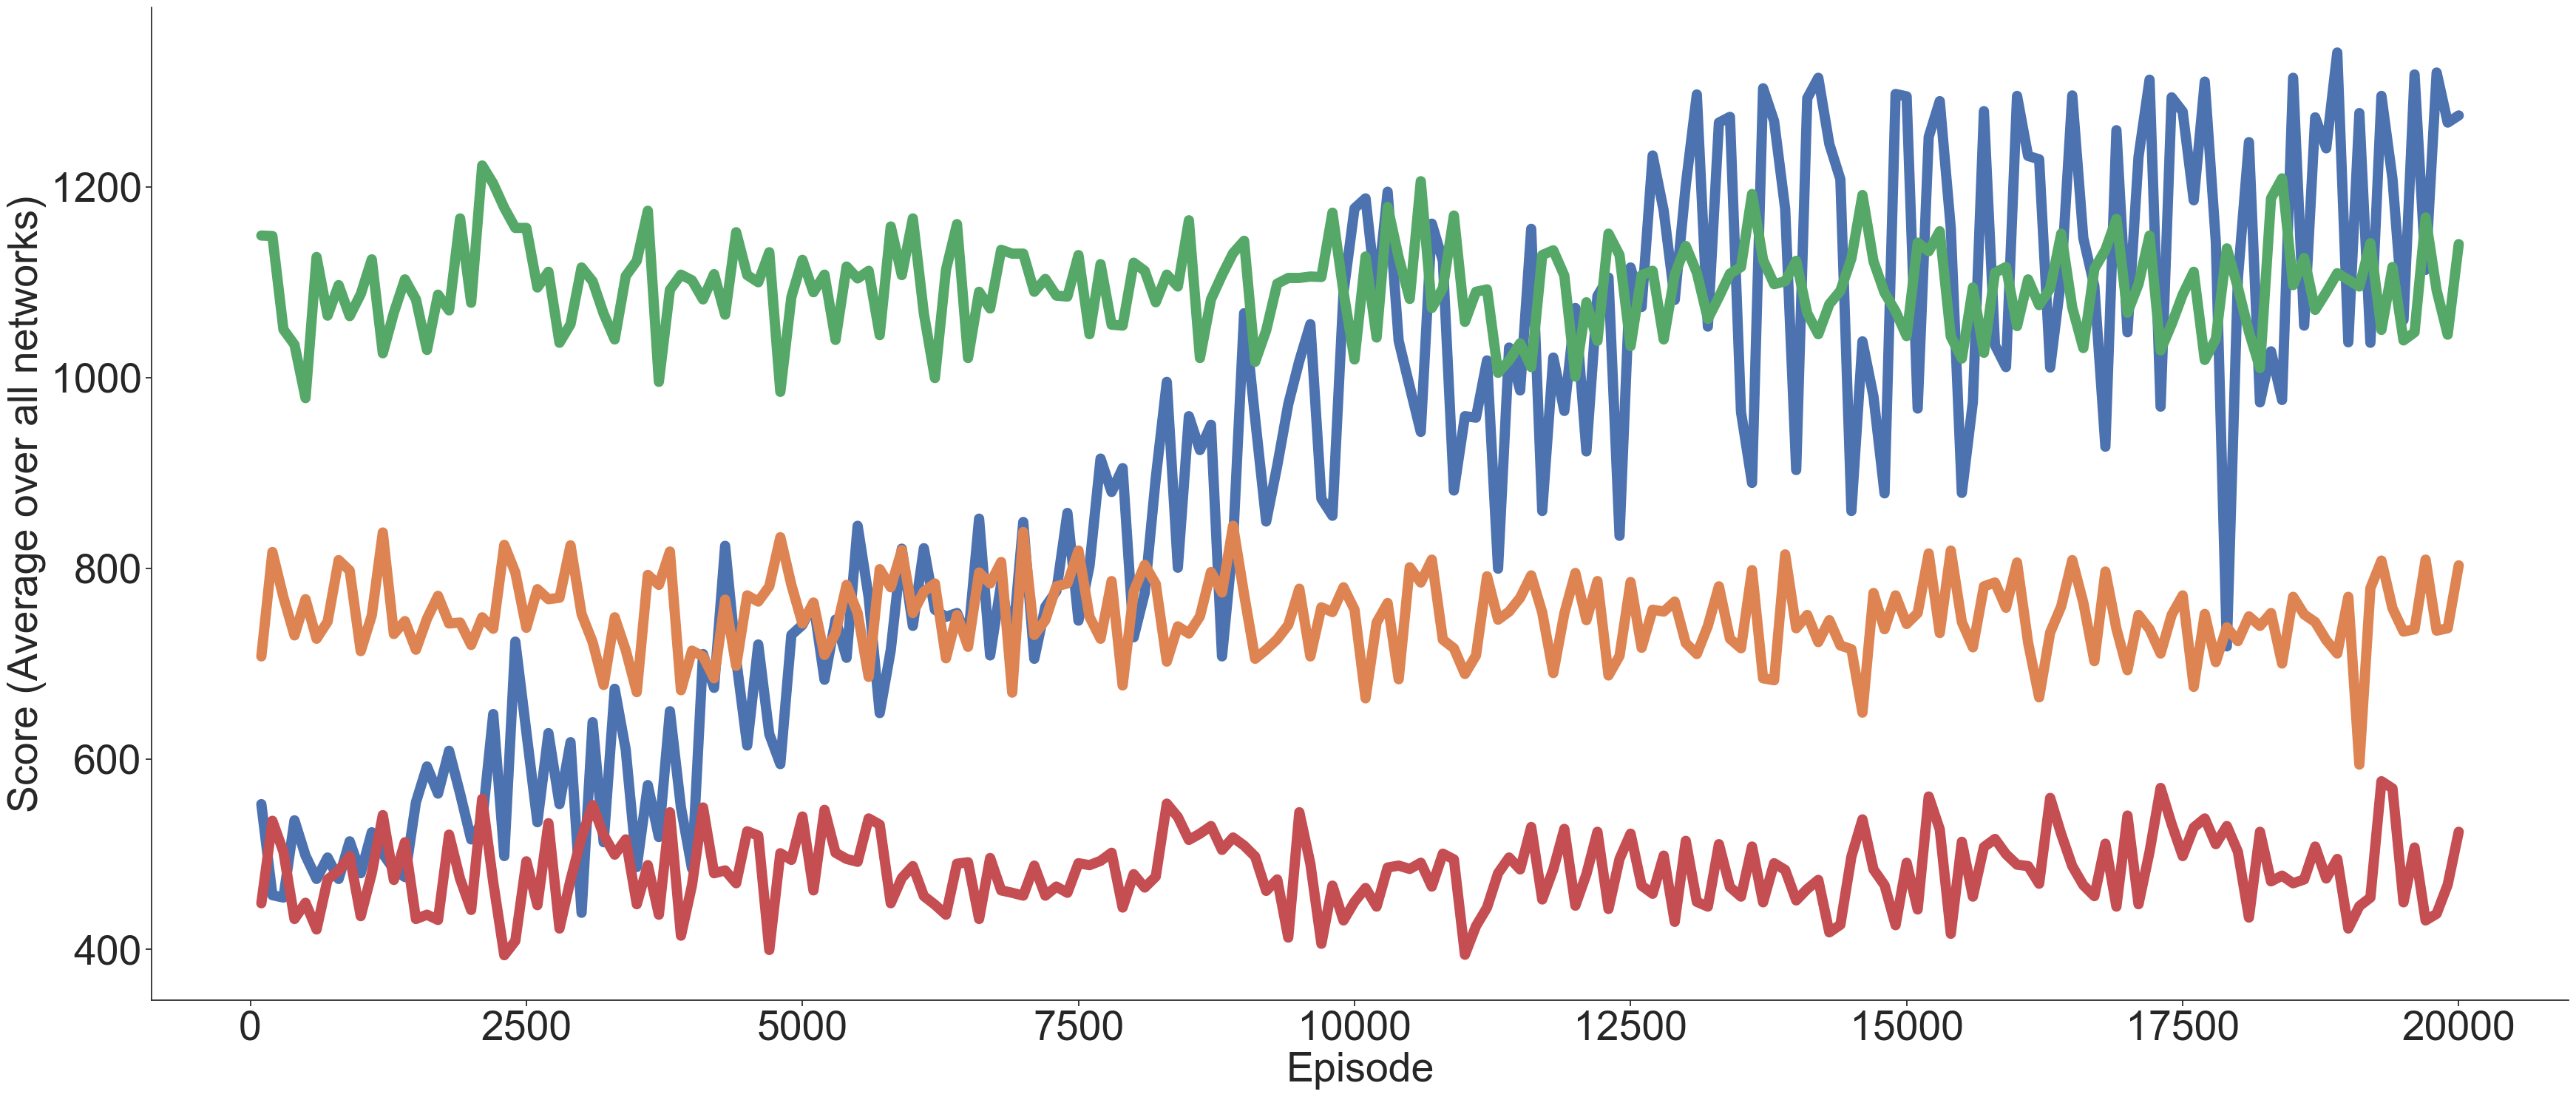

In [9]:
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='red', lw=4)]

fig, ax = plt.subplots(figsize=(35,15))
ax = sns.lineplot(x='episode',
                  y="metric_value",
                  hue='metric_name',
                  linewidth=10,
                  ax=ax,
                  legend=False,
                  data=df[ (df['metric_name'].isin([
                     'avg_reward_all_envs',
                     'avg_reward_rule_based_myopic_all_envs',
                     'avg_reward_rule_based_3losses_all_envs',
                     'avg_reward_rule_based_random_all_envs'])) & (df['episode']%100==0) ])

# ax.legend(custom_lines, ['Individual (no social learning)'],loc=3,fontsize=30, frameon=False)

ax.set_xlabel('Episode', fontsize=40)
plt.xticks(fontsize=40)
ax.set_ylabel('Score (Average over all networks)', fontsize=40)
plt.yticks(fontsize=40)
#ax.set_ylim(-500, 1700)
#ax.set_xlim(-1, 15)

plt.tight_layout()
#plt.savefig(os.path.join(figures_path,'algorithm_train_comparison_TEST.pdf'), format='pdf', dpi=300)
#plt.savefig(os.path.join(figures_path,'algorithm_train_comparison_TEST.png'), format='png', dpi=300)

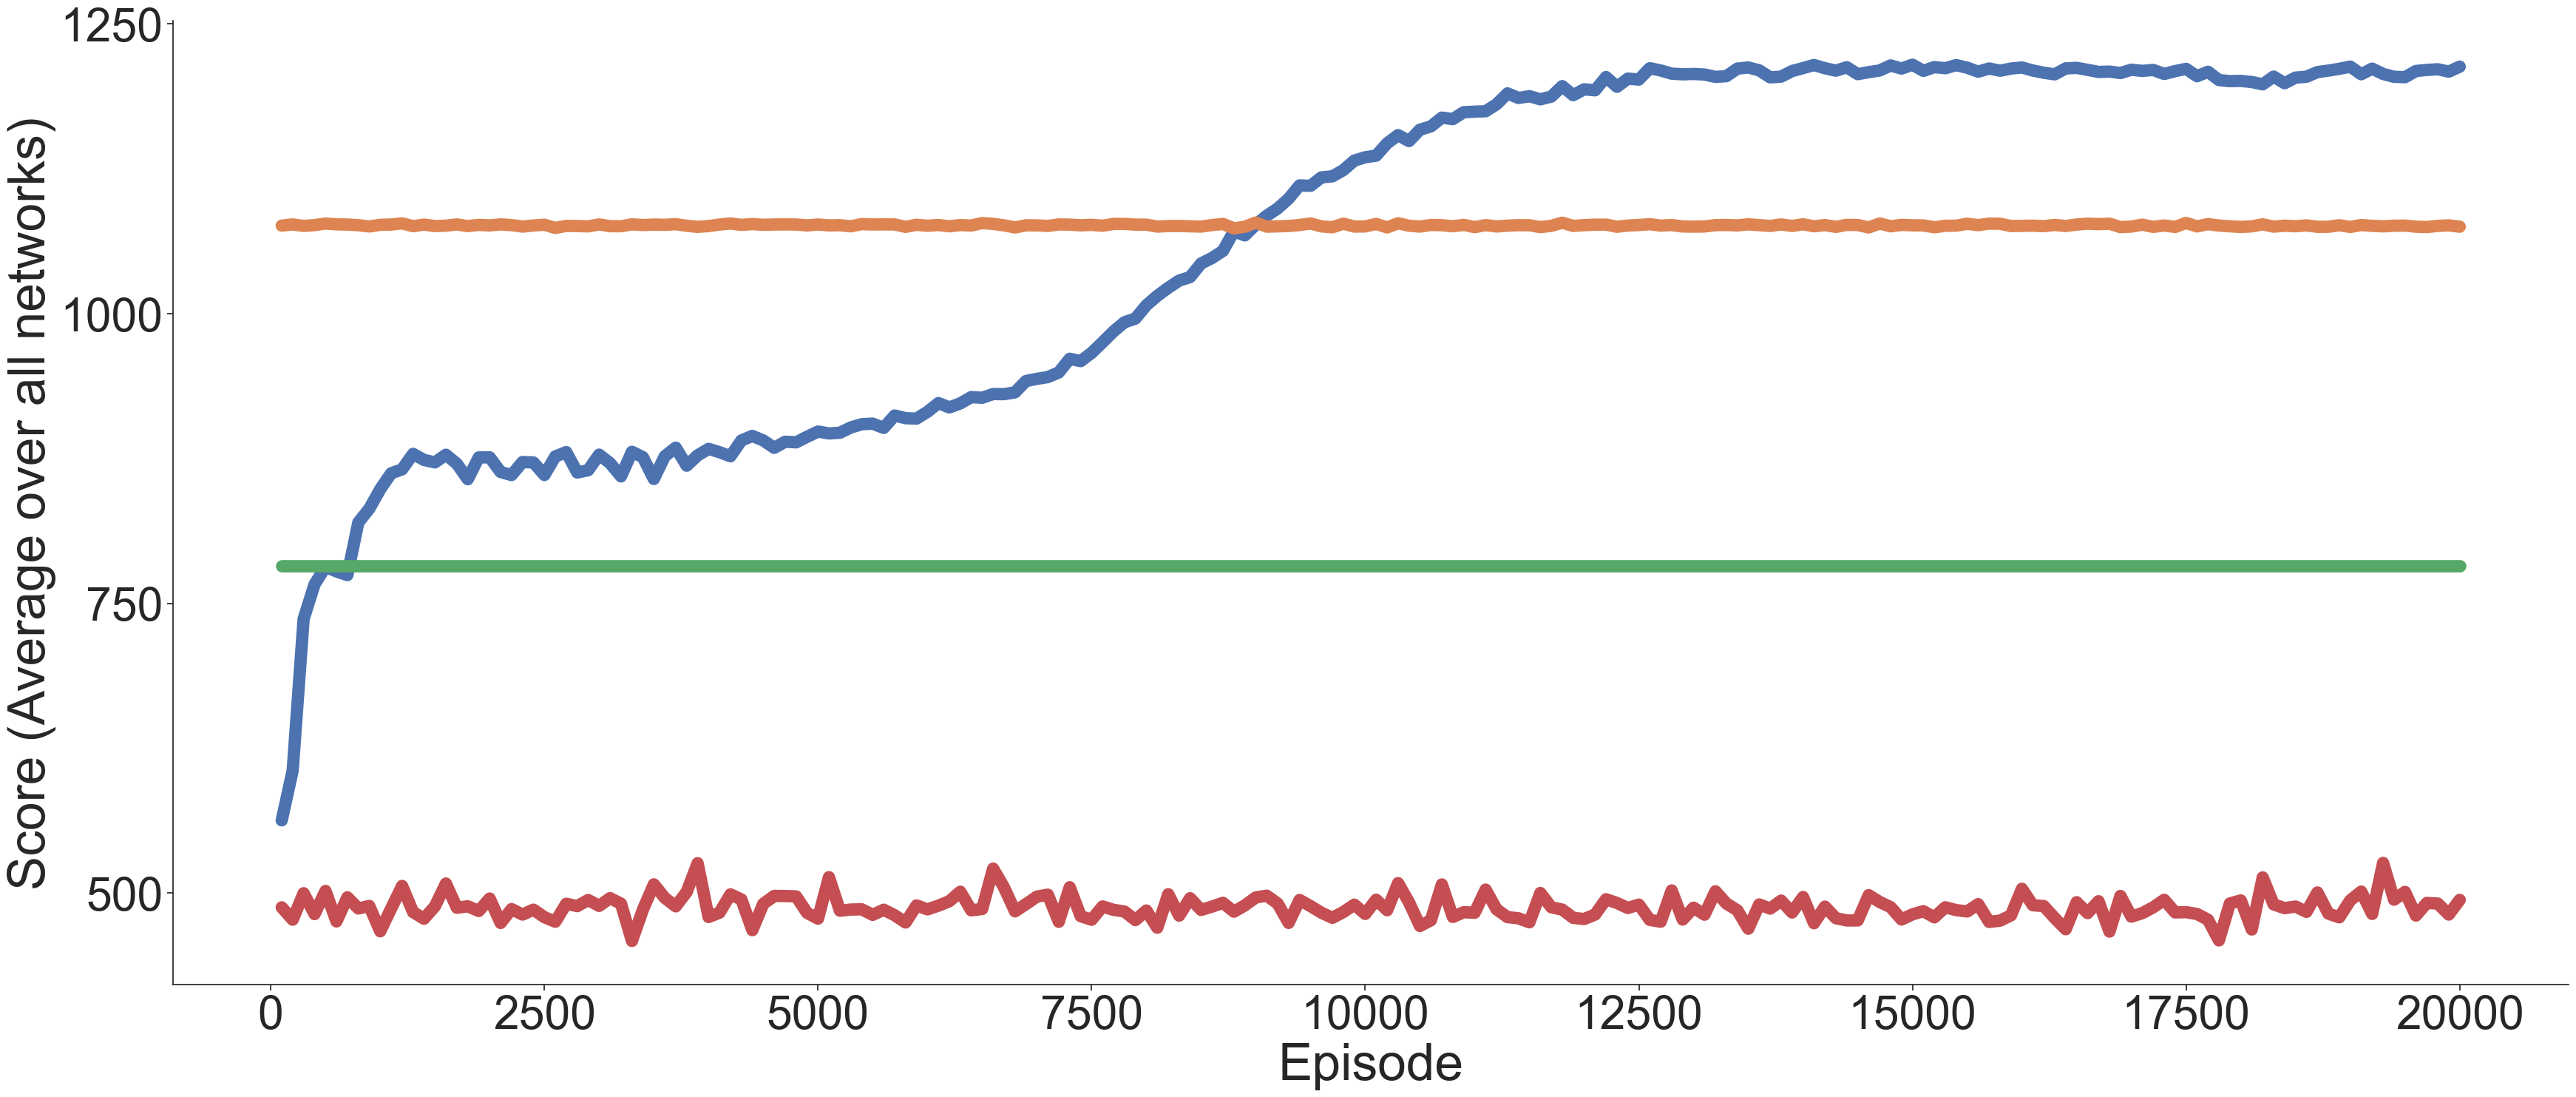

In [15]:
custom_lines = [Line2D([0], [0], color='red', lw=4)]

fig, ax = plt.subplots(figsize=(35,15))
ax = sns.lineplot(x='episode',y="metric_value",hue='metric_name', ax=ax, linewidth=12,legend=False,
             data=df[(df['metric_name'].isin(['test_avg_reward_all_envs',
                     'test_avg_reward_rule_based_3losses_all_envs',
                     "test_avg_reward_rule_based_myopic_all_envs",
                    'test_avg_reward_rule_based_random_all_envs'])) & (~df['metric_value'].isna()) ])

#ax.legend(custom_lines, ['Individual (no social learning)'],loc=3,fontsize=30, frameon=False)

ax.set_xlabel('Episode', fontsize=50)
plt.xticks(fontsize=45)
ax.set_ylabel('Score (Average over all networks)', fontsize=50)
plt.yticks([500,750, 1000, 1250],fontsize=45)
#ax.set_ylim(-500, 1700)
#ax.set_xlim(-1, 15)

plt.tight_layout()
plt.savefig(os.path.join(figures_path,'algorithm_test_comparison.pdf'), format='pdf', dpi=300)
plt.savefig(os.path.join(figures_path,'algorithm_test_comparison.png'), format='png', dpi=600)